In [36]:
# !pip install palmerpenguins
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, geom_bar, geom_hline
df = pd.read_csv('insurance_costs_1.csv')
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.90,yes,southwest,16884.92
1,33,male,22.70,no,northwest,21984.47
2,32,male,28.88,no,northwest,3866.86
3,31,female,25.74,no,southeast,3756.62
4,60,female,25.84,no,northwest,28923.14


In [37]:
# convert 'sex' and 'smoker' column to 1 and 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df.head()

,age,sex,bmi,smoker,region,charges
0,19,0,27.90,1,southwest,16884.92
1,33,1,22.70,0,northwest,21984.47
2,32,1,28.88,0,northwest,3866.86
3,31,0,25.74,0,southeast,3756.62
4,60,0,25.84,0,northwest,28923.14


In [ ]:
# print(df.dtypes)

## Part 1: Data Exploration

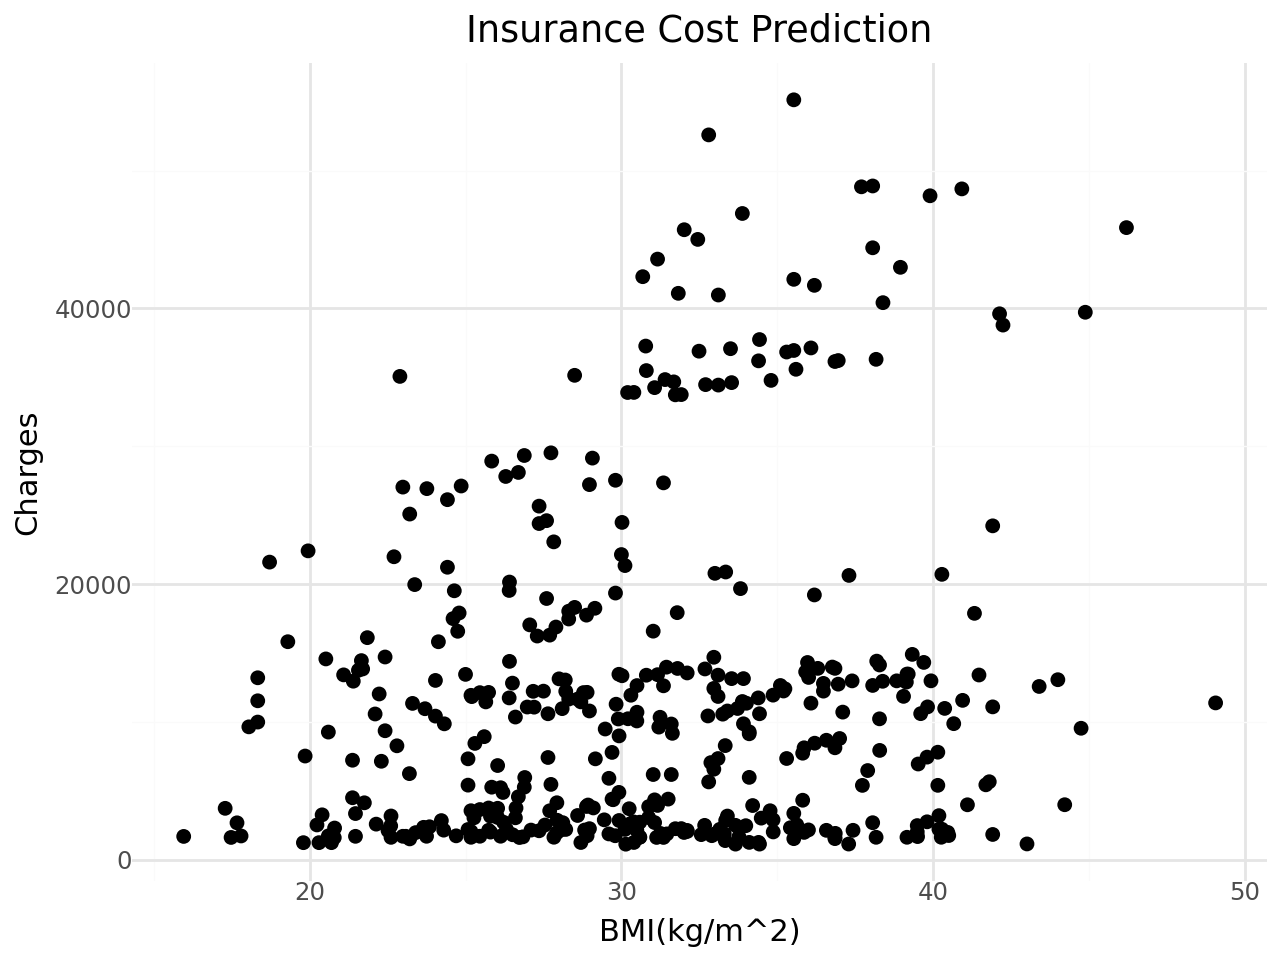

In [38]:
df = df.dropna()
y = df['charges']
X = df[['bmi']]

bmi_charges_plot = (
    ggplot(data=df, mapping=aes(x='bmi', y='charges')) +
    geom_point(color='black', size=2) +
    labs(x='BMI(kg/m^2)', y='Charges',
         title='Insurance Cost Prediction') +
    theme_minimal()
)

bmi_charges_plot

we can see from the scatter plot that there's no clear relationship between someone's BMI and their insurance premium

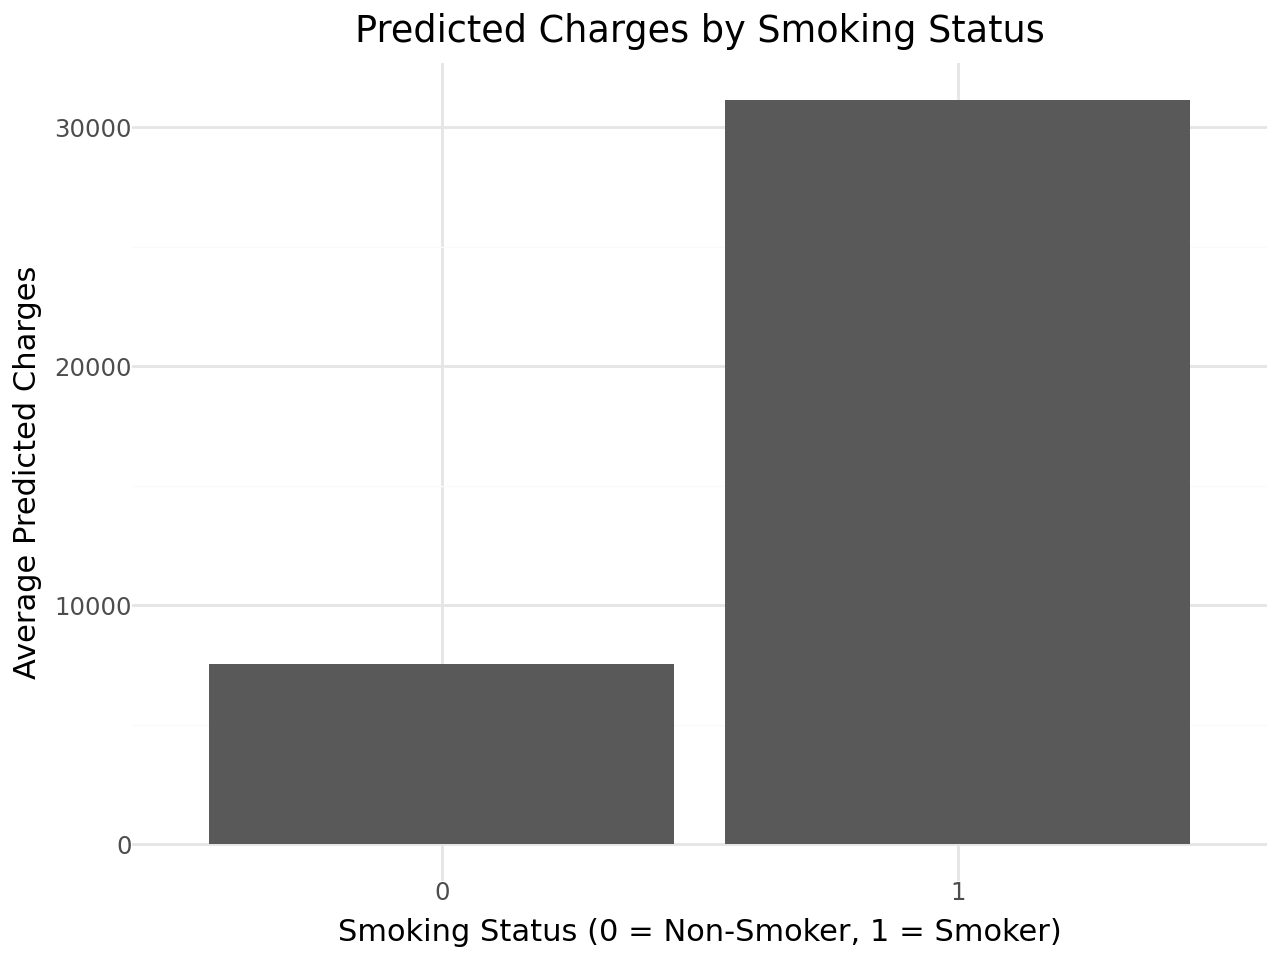

In [39]:
y = df['charges']
X = df[['smoker']]
# Calculate the mean prediction for each smoker category
mean_predictions = df.groupby('smoker')['charges'].mean().reset_index()

smoker_charges_plot = (
    ggplot(data=mean_predictions, mapping=aes(x='factor(smoker)', y='charges')) +
    geom_bar(stat='identity') +
    labs(x='Smoking Status (0 = Non-Smoker, 1 = Smoker)', y='Average Predicted Charges', title='Predicted Charges by Smoking Status') +
    theme_minimal()
)

smoker_charges_plot


We can see from the box plot above that smokers tend to get charged about 3 times more on insurance than non-smokers

## Part 2: Simple Linear Models

In [40]:
# model_age - include only 'age' as explanatory variable
y = df['charges']
X = df[['age']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_age = LinearRegression()
model_age_fit = model_age.fit(X_train, y_train)


#intercept = model.intercept_
#coefficient = model.coef_[0]
#print("Intercept:", intercept)
#print("Coefficient for age:", coefficients[0])

y_pred = model_age.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
#print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

#sort = df.sort_values(by = 'age')
#sort_X = sort[['age']]
#y_pred = model_fit.predict(sort_X)
#predictions = pd.DataFrame({'age': sort_X['age'], 'charges': y_pred})

Mean Squared Error (MSE): 121801716.15974969
R-squared (R²): 0.138708925669628


In [41]:
# model_age_sex - include 'age' and 'sex' as explanatory variable
X = df[['age', 'sex']]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model with both 'age' and 'sex' as predictors
model_age_sex = LinearRegression()
model_age_sex.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_sex.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 123710493.45774047
R-squared (R²): 0.1252114734047708


In [42]:
# model_age_smoker - include 'age' and 'smoker' as explanatory variable
X = df[['age', 'smoker']]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model with both 'age' and 'smoker' as predictors
model_age_smoker = LinearRegression()
model_age_smoker.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_smoker.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 27352787.784298655
R-squared (R²): 0.8065814446672434


Compare the MSE and R^2 for **model_age_sex** and **model_age_smoker**, we can see that ***model_age_smoker has a smaller MSE and a larger R^2*** which means that the it explains more of the sample variation in the charges. So model_age_smoker better fits the data

## Part Three: Multiple Linear Models

In [43]:
# model_age_bmi - include 'age' and 'bmi' as explanatory variable
X = df[['age', 'bmi']]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model with both 'age' and 'bmi' as predictors
model_age_bmi = LinearRegression()
model_age_bmi.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_bmi.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 117716955.13097996
R-squared (R²): 0.16759331519857057


Compare MSE and R^2 for **model_age** and **model_age_bmi**, ***model_age_bmi has a smaller MSE and a larger R^2***, so it's a better model


In [44]:
# model_age_2 - include 'age' and 'age^2' as explanatory variable
df['age_squared'] = df['age'] ** 2
X = df[['age', 'age_squared']]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model with both 'age' and 'age^2' as predictors
model_age_2 = LinearRegression()
model_age_2.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_2.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 121747479.23006293
R-squared (R²): 0.1390924488654508


Compare MSE and R^2 for **model_age** and **model_age_2**, we can see that ***model_age_2 performs slightly better because it has a smaller MSE and a larger R^2***

In [45]:
# model_age_4 - polynomial degree 4

from sklearn.preprocessing import PolynomialFeatures
# Initialize PolynomialFeatures with degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)

# Transform the 'age' column to include terms up to 'age^4'
X_poly_4 = poly.fit_transform(df[['age']])  # Creates columns for 'age', 'age^2', 'age^3', 'age^4'

# Define X and y
X = X_poly_4
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_age_4 = LinearRegression()
model_age_4.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_4.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 119880218.40966608
R-squared (R²): 0.15229632750329603


Compare MSE and R^2 for **model_age** and **model_age_4**, ***model_age_4 performs better because it has a smaller MSE and a larger R^2***

In [46]:
# model_age_12 - polynomial degree 12

# Initialize PolynomialFeatures with degree 12
poly = PolynomialFeatures(degree=12, include_bias=False)

# Transform the 'age' column to include terms up to 'age^12'
X_poly_12 = poly.fit_transform(df[['age']])

# Define X and y
X = X_poly_12
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_age_12 = LinearRegression()
model_age_12.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model_age_12.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 122509817.49772136
R-squared (R²): 0.1337017600783279


Compare MSE and R^2 for **model_age** and **model_age_12**, ***model_age has a slightly smaller MSE and a larger R^2***

### P3 Q5 - According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

According to MSE and R^2 from all the models above, it seems like model_age_smoker is the best model. However, we will never know if it's the best model because the ultimate goal of constructing a model is to make predict from new test data, so even though model_age_smoker has the best evaluation values in this test data, it doesn't mean it fits the best for other test data.

#### P3 Q6 - Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

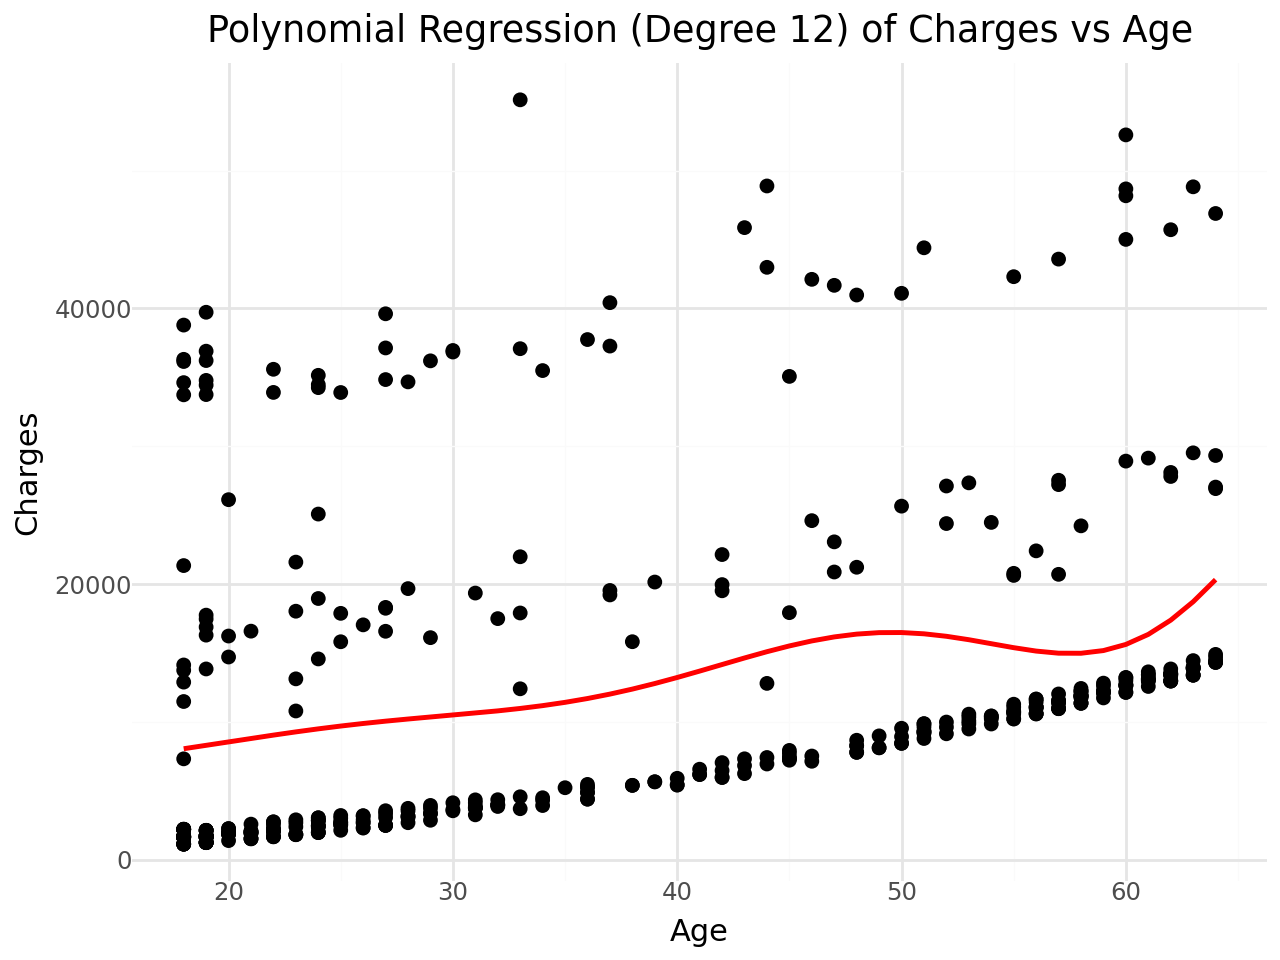

In [47]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

# Sort the original data by 'age'
sorted_df = df.sort_values(by='age')

# Create polynomial features for the sorted 'age' data
sorted_age_poly = poly.transform(sorted_df[['age']])

# Predict charges based on the degree 4 polynomial model
sorted_df['predicted_charges'] = model_age_12.predict(sorted_age_poly)

# Plot using plotnine
plot = (
    ggplot(sorted_df, aes(x='age', y='charges')) +
    geom_point(color='black', size=2) +  # Scatter plot of original data
    geom_line(aes(y='predicted_charges'), color='red', size=1) +  # Line plot of predictions
    labs(
        x='Age',
        y='Charges',
        title='Polynomial Regression (Degree 12) of Charges vs Age'
    ) +
    theme_minimal()
)

plot


## Part Four: New data

In [48]:
df2 = pd.read_csv('insurance_costs_2.csv')
df2.head()

# convert 'sex' and 'smoker' column to 1 and 0
df2['sex'] = df2['sex'].map({'male': 1, 'female': 0})
df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})

df2.head()

,age,sex,bmi,smoker,region,charges
0,23,1,34.40,0,southwest,1826.84
1,56,1,40.30,0,southwest,10602.39
2,18,1,34.10,0,southeast,1137.01
3,63,0,23.09,0,northeast,14451.84
4,63,1,28.31,0,northwest,13770.10


In [57]:
# model1 - age

X = df[['age']]
y = df['charges']

model1 = LinearRegression()
model1.fit(X, y)

# fit into new data
X_new = df2[['age']]
y_new = df2['charges']

y_new_pred = model1.predict(X_new)

mse_1 = mean_squared_error(y_new, y_new_pred)
r2_1 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse_1)
print("R-squared (R²):", r2_1)

Mean Squared Error (MSE): 136077136.50195494
R-squared (R²): 0.12236515675533055


In [58]:
# model2 - age, bmi

X = df[['age', 'bmi']]
y = df['charges']

model2 = LinearRegression()
model2.fit(X, y)

# fit into new data
X_new = df2[['age', 'bmi']]
y_new = df2['charges']

y_new_pred = model2.predict(X_new)

mse_2 = mean_squared_error(y_new, y_new_pred)
r2_2 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse_2)
print("R-squared (R²):", r2_2)

Mean Squared Error (MSE): 132636406.1108129
R-squared (R²): 0.14455628272331222


In [51]:
# model3 - age, bmi, smoker using original data
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

model3 = LinearRegression()
model3.fit(X, y)

# fit into new data
X_new = df2[['age', 'bmi', 'smoker']]
y_new = df2['charges']

y_new_pred = model3.predict(X_new)

mse_3 = mean_squared_error(y_new, y_new_pred)
r2_3 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse_3)
print("R-squared (R²):", r2_3)

Mean Squared Error (MSE): 35377541.24141632
R-squared (R²): 0.7718311565047801


In [59]:
# model4 - age, bmi, (age+smoker), (bmi+smoker) using original data
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker']
X = df[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y = df['charges']

model4 = LinearRegression()
model4.fit(X, y)

# fit into new data
df2['age_smoker'] = df2['age'] * df2['smoker']
df2['bmi_smoker'] = df2['bmi'] * df2['smoker']

X_new= df2[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_new = df2['charges']

y_new_pred = model4.predict(X_new)

mse_4 = mean_squared_error(y_new, y_new_pred)
r2_4 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse_4)
print("R-squared (R²):", r2_4)

Mean Squared Error (MSE): 24795908.41264334
R-squared (R²): 0.8400778135676982


In [60]:
# model5 - age, bmi, smoker, (age+smoker), (bmi+smoker) using original data
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker']

X = df[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
y = df['charges']

model5 = LinearRegression()
model5.fit(X, y)

# fit into new data
df2['age_smoker'] = df2['age'] * df2['smoker']
df2['bmi_smoker'] = df2['bmi'] * df2['smoker']

X_new = df2[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
y_new = df2['charges']

y_new_pred = model5.predict(X_new)

mse_5 = mean_squared_error(y_new, y_new_pred)
r2_5 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse_5)
print("R-squared (R²):", r2_5)

Mean Squared Error (MSE): 21786256.86685252
R-squared (R²): 0.859488679569962


In [61]:
# summary
pd.options.display.float_format = '{:.2f}'.format
mse_values = [mse_1, mse_2, mse_3, mse_4, mse_5]
r2_values = [r2_1, r2_2, r2_3, r2_4, r2_5]

# Create a DataFrame
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
    'MSE': mse_values,
    'R²': r2_values
}

summary = pd.DataFrame(data)

print(summary)


     Model          MSE   R²
0  Model 1 136077136.50 0.12
1  Model 2 132636406.11 0.14
2  Model 3  35377541.24 0.77
3  Model 4  24795908.41 0.84
4  Model 5  21786256.87 0.86


Based on the summary above, we can see that model5 has the smallest MSE and the largest R^2, therefore, we can conclude that model5 (with 'age', 'bmi', 'smoker', '(age+smoker)', '(bmi+smoker)' as explanatory variables) is the best model out of all five

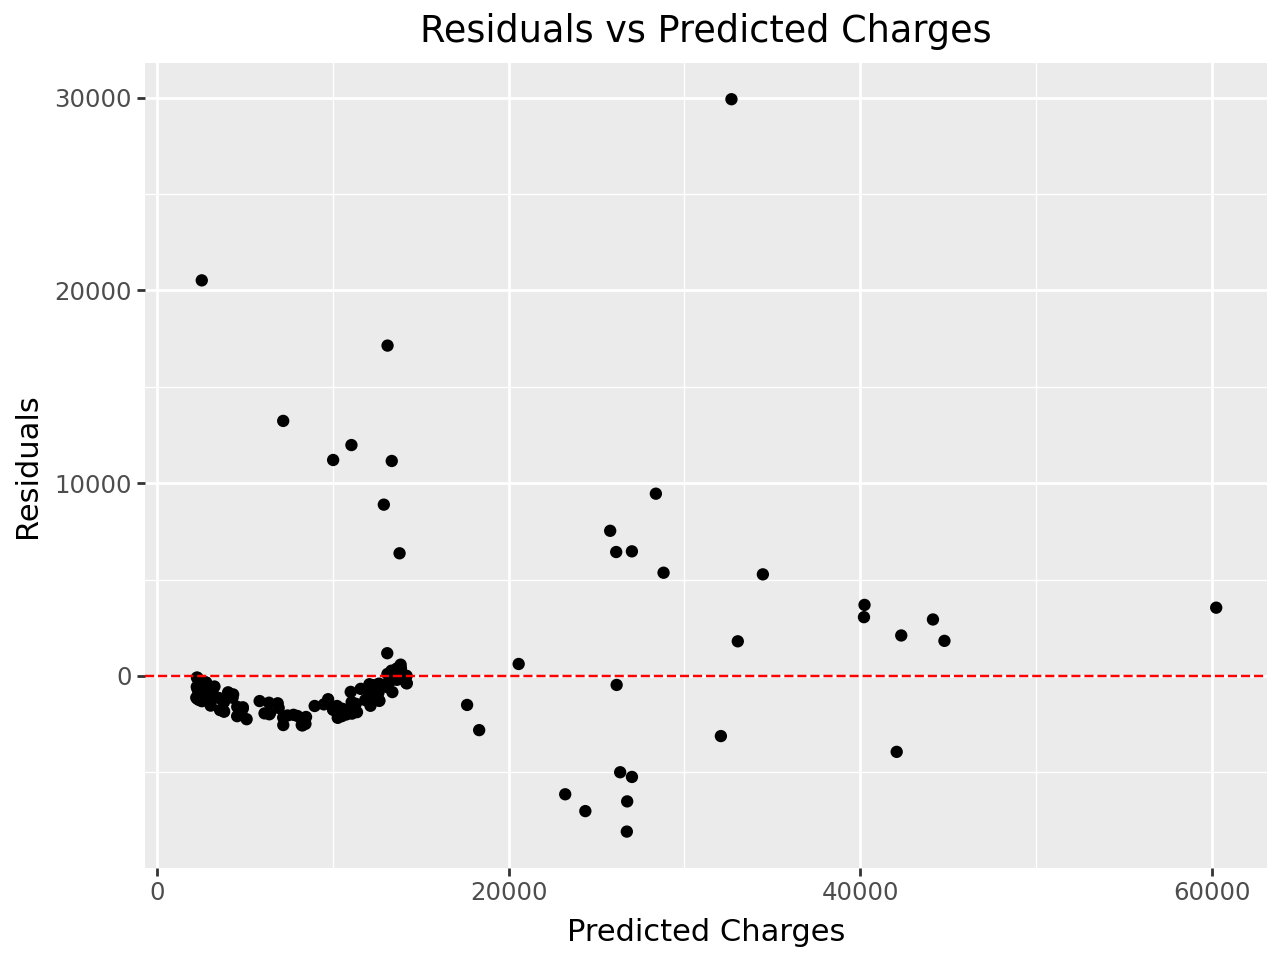

In [62]:
# Create a DataFrame for the new data with actual and predicted values
plot_data = pd.DataFrame({
    'predicted_charges': y_new_pred,
    'residuals': y_new - y_new_pred
})

# Plot residuals against predicted charges
plot = (
    ggplot(plot_data, aes(x='predicted_charges', y='residuals')) +
    geom_point() +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title="Residuals vs Predicted Charges",
         x="Predicted Charges",
         y="Residuals")
)

plot

## Part Five: Full Exploration

Based on the observation from part2 and part3, the best model is the one
that includes the interactions term with 'smoker', therefore, i try including 'sex' and all the other possible interaction term

In [63]:
# construct model using original data
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']
df['sex_smoker'] = df['sex'] * df['smoker']
df['age_bmi'] = df['age'] * df['bmi']
df['age_sex'] = df['age'] * df['sex']
df['bmi_sex'] = df['bmi'] * df['sex']

X = df[['age', 'bmi', 'sex', 'smoker', 'bmi_smoker', 'age_smoker', 'sex_smoker', 'age_bmi', 'age_sex', 'bmi_sex']]
y = df['charges']

full_model = LinearRegression()
full_model.fit(X, y)

# fit in new data
df2['bmi_smoker'] = df2['bmi'] * df2['smoker']
df2['age_smoker'] = df2['age'] * df2['smoker']
df2['sex_smoker'] = df2['sex'] * df2['smoker']
df2['age_bmi'] = df2['age'] * df2['bmi']
df2['age_sex'] = df2['age'] * df2['sex']
df2['bmi_sex'] = df2['bmi'] * df2['sex']

X_new = df2[['age', 'bmi', 'sex', 'smoker', 'bmi_smoker', 'age_smoker', 'sex_smoker', 'age_bmi', 'age_sex', 'bmi_sex']]
y_new = df2['charges']

y_new_pred = full_model.predict(X_new)

mse = mean_squared_error(y_new, y_new_pred)
r2 = r2_score(y_new, y_new_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 21792904.439788654
R-squared (R²): 0.8594458057868877


The result is pretty similar to model5 from part4 but perform slightly worse, with a slightly larger MSE and smaller R^2, however, i tried other combinations for explanatory variables, and this one is the best out of all of them

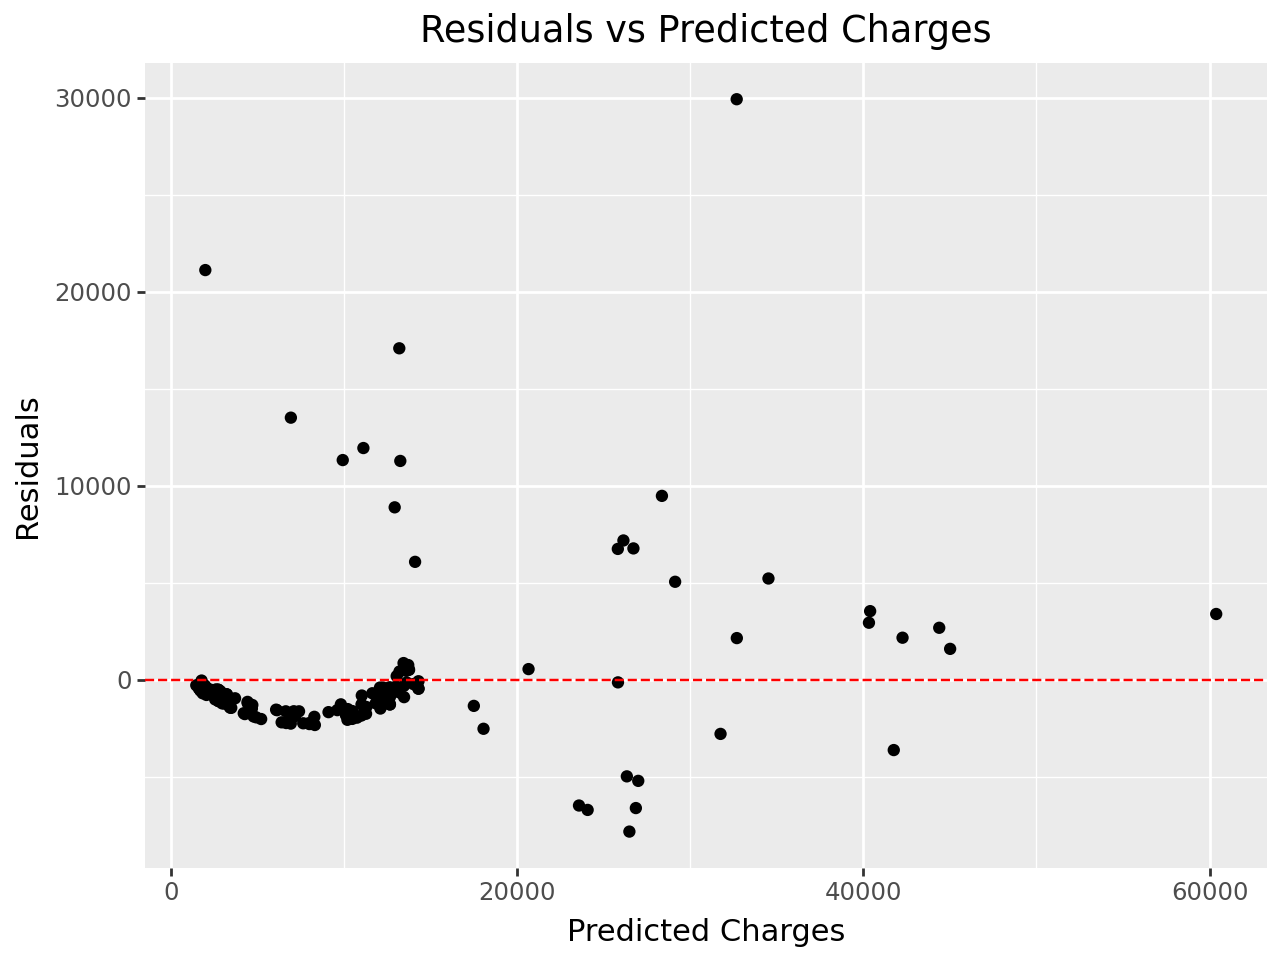

In [64]:
plot_data_2 = pd.DataFrame({
    'predicted_charges': y_new_pred,
    'residuals': y_new - y_new_pred
})

plot = (
    ggplot(plot_data_2, aes(x='predicted_charges', y='residuals')) +
    geom_point() +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title="Residuals vs Predicted Charges",
         x="Predicted Charges",
         y="Residuals")
)
plot

The plot appears to be very similar to the plot for model5, because they have a really close R^2 and MSE value